In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
np.random.seed(42)
X = 2*np.random.rand(100,1)
true_coef=3
y = true_coef*X + np.random.randn(100,1)

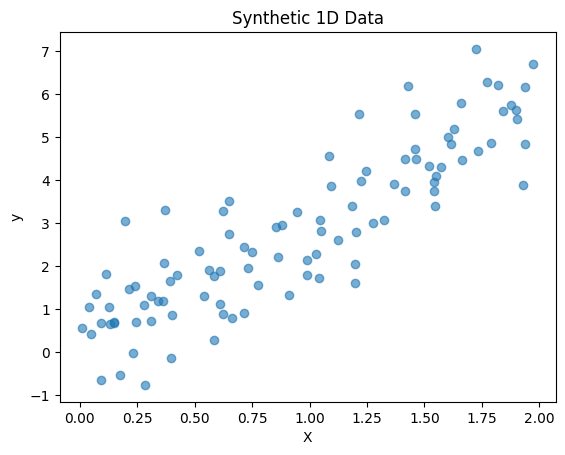

In [4]:
plt.scatter(X, y, alpha=0.6)
plt.title("Synthetic 1D Data")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [6]:
from sklearn.linear_model import Ridge

sk_model = Ridge(alpha=10)
sk_model.fit(X,y)
print(f"Sklearn Coef: {float(sk_model.coef_[0]):.4f}, Intercept: {float(sk_model.intercept_):.4f}")

Sklearn Coef: 2.1552, Intercept: 0.7934


<ipython-input-6-be95a11610a1>:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(f"Sklearn Coef: {float(sk_model.coef_[0]):.4f}, Intercept: {float(sk_model.intercept_):.4f}")


In [7]:
class myRidge:
  def __init__(self, alpha=1.0):
    self.alpha = alpha
    self.m = None
    self.b = None

  def fit(self, X, y):
    num=0
    den=0

    for i in range(X.shape[0]):
      num=num+((X[i]-X.mean())*(y[i]-y.mean()))
      den=den+((X[i]-X.mean())*(X[i]-X.mean()))

    self.m = num/(den+self.alpha)
    self.b = y.mean() - self.m*X.mean()
    #print(self.m, self.b)

  def predict(self, X):
    return self.m*X + self.b



In [8]:
R = myRidge(alpha=10)
R.fit(X,y)
y_pred = R.predict(X)

[2.15516098] [0.79337372]
